In [1]:
"""
🧠 What Are Sharpe and Sortino Ratios?
"""

'\n🧠 What Are Sharpe and Sortino Ratios?\n'

In [4]:
"""
📊 Sharpe Ratio (Risk-Adjusted Return)
The Sharpe Ratio helps you understand how much return you're getting for each unit of risk you take.

Imagine you have two investments.

Both make money, but one goes up and down a lot (risky), and the other is more stable (less risky).

The Sharpe Ratio tells you which one gives you better returns relative to the risk.

Formula:

Sharpe Ratio = (Average Return − Risk-Free Rate) / Standard Deviation of Return

 
"""

"\n📊 Sharpe Ratio (Risk-Adjusted Return)\nThe Sharpe Ratio helps you understand how much return you're getting for each unit of risk you take.\n\nImagine you have two investments.\n\nBoth make money, but one goes up and down a lot (risky), and the other is more stable (less risky).\n\nThe Sharpe Ratio tells you which one gives you better returns relative to the risk.\n\nFormula:\n\nSharpe\xa0Ratio = (Average\xa0Return − Risk-Free\xa0Rate) / Standard\xa0Deviation\xa0of\xa0Return\n\n \n"

In [3]:
"""
🛡️ Sortino Ratio (Downside-Risk Adjusted Return)
The Sortino Ratio is similar but focuses only on bad risk (when your investment drops in value).

It ignores good volatility (when returns go up).

It helps you see how much return you're getting for each unit of downside risk.

Formula:

Sortino Ratio = (Average Return − Risk-Free Rate) / Downside Deviation

"""

"\n🛡️ Sortino Ratio (Downside-Risk Adjusted Return)\nThe Sortino Ratio is similar but focuses only on bad risk (when your investment drops in value).\n\nIt ignores good volatility (when returns go up).\n\nIt helps you see how much return you're getting for each unit of downside risk.\n\nFormula:\n\nSortino\xa0Ratio\n=\nAverage\xa0Return\n−\nRisk-Free\xa0Rate\nDownside\xa0Deviation\nSortino\xa0Ratio= \nDownside\xa0Deviation\nAverage\xa0Return−Risk-Free\xa0Rate\n\u200b\n\n"

In [5]:
"""Python Example: Sharpe and Sortino Using Time Series Data"""

'Python Example: Sharpe and Sortino Using Time Series Data'

Sharpe Ratio: 0.04
Sortino Ratio: 0.08


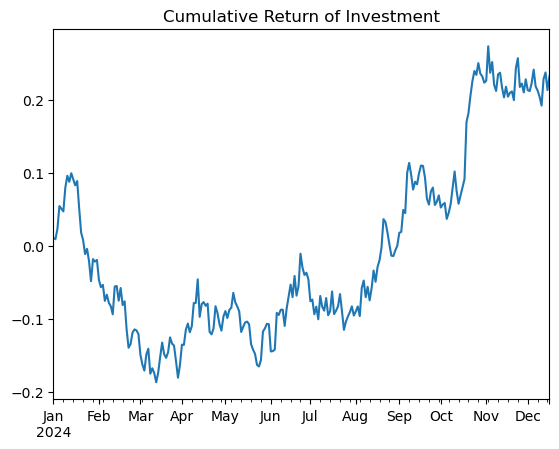

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate daily returns for 1 year (252 trading days)
np.random.seed(42)
daily_returns = np.random.normal(loc=0.001, scale=0.02, size=252)  # mean=0.1%, std dev=2%
dates = pd.date_range(start='2024-01-01', periods=252, freq='B')  # business days
returns = pd.Series(daily_returns, index=dates)

# Set risk-free rate (e.g., 0.02 annual, converted to daily)
risk_free_rate = 0.02 / 252

# Sharpe Ratio
excess_returns = returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / returns.std()

# Sortino Ratio
downside_returns = returns[returns < 0]
downside_std = downside_returns.std()
sortino_ratio = excess_returns.mean() / downside_std

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Plot the returns
returns.cumsum().plot(title="Cumulative Return of Investment")
plt.show()


In [ ]:
"""
 Coding Exercise: Practice Sharpe and Sortino
Try solving these on your own:

1. 🧪 Modify the Risk
Change the scale of np.random.normal from 0.02 to 0.04.

What happens to the Sharpe and Sortino ratios?

Why?

2. 📉 Compare Two Assets
Generate two return series with different volatilities (e.g., one stable, one volatile).

Calculate Sharpe and Sortino for both.

Which one is better?

3. 📆 Use Real Data
Download historical prices of a stock (e.g., Apple, AAPL) using yfinance.

Convert it to daily returns.

Calculate Sharpe and Sortino ratios using the real data.
"""

Sharpe Ratio: 0.02
Sortino Ratio: 0.04


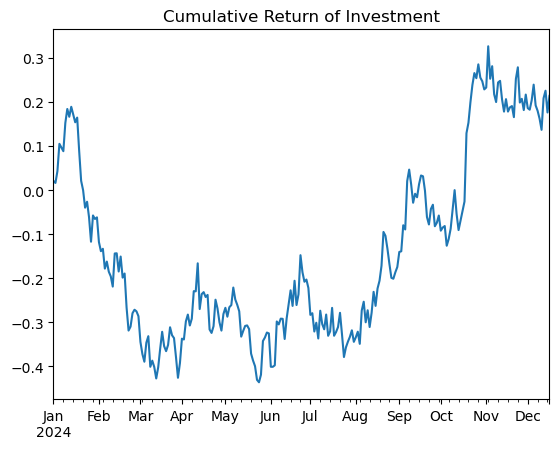

In [2]:
# Task 1
np.random.seed(42)
daily_returns = np.random.normal(loc=0.001, scale=0.04, size=252)  # mean=0.1%, std dev=2%
dates = pd.date_range(start='2024-01-01', periods=252, freq='B')  # business days
returns = pd.Series(daily_returns, index=dates)

# Set risk-free rate (e.g., 0.02 annual, converted to daily)
risk_free_rate = 0.02 / 252

# Sharpe Ratio
excess_returns = returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / returns.std()

# Sortino Ratio
downside_returns = returns[returns < 0]
downside_std = downside_returns.std()
sortino_ratio = excess_returns.mean() / downside_std

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Plot the returns
returns.cumsum().plot(title="Cumulative Return of Investment")
plt.show()


In [ ]:
"""
Both Sharpe and Sortino are return per unit of risk .
If we double your volatility (the risk) but keep the same average return, we halve the return per unit ofrisk, so both ratios drop by about 50%.
"""

''

In [3]:
def compute_ratios(returns, rf_annual=0.02):

    rf_daily = rf_annual / 252
    excess = returns - rf_daily
    sharpe = excess.mean() / returns.std()
    downside_std = returns[returns < 0].std()
    sortino = excess.mean() / downside_std
    return sharpe, sortino

In [11]:
#Task 2 

np.random.seed(0)
returns_stable = pd.Series(
    np.random.normal(loc=0.001, scale=0.01, size=252))

np.random.seed(1)
returns_volatile = pd.Series(
    np.random.normal(loc=0.001, scale=0.04, size=252))

sr_stable, so_stable = compute_ratios(returns_stable)
sr_volatile, so_volatile = compute_ratios(returns_volatile)


print(f"  Stable (0.01) : Sharpe = {sr_stable:.4f}, Sortino = {so_stable:.4f}")
print(f"  Volatile (0.04) : Sharpe = {sr_volatile:.4f}, Sortino = {so_volatile:.4f}\n")


""" 

Answer:
The stable assest is better

"""

  Stable (0.01) : Sharpe = 0.1240, Sortino = 0.2413
  Volatile (0.04) : Sharpe = 0.1014, Sortino = 0.1777



' \n\nAnswer:\nThe stable assest is better\n\n'

In [19]:
#Task 3

import yfinance as yf
aapl = yf.download("AAPL", start="2024-01-01", end="2025-01-01", progress=False)["Close"]
returns_aapl = aapl.pct_change().dropna()

sr_aapl, so_aapl = compute_ratios(returns_aapl)

print(f'Sharpe = {sr_aapl[0]:.4f}')
print(f'Sortino = {so_aapl[0]:.4f}')


/var/folders/m2/40hfsw_d5n19061rmy7jqm680000gn/T/ipykernel_66218/1285790316.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download("AAPL", start="2024-01-01", end="2025-01-01", progress=False)["Close"]


Sharpe = 0.0872
Sortino = 0.1389
